## [DIABETES-PREDICTION-DATASET](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

## TODOS OS IMPORTS (SIM SÃO MUITOS)

In [25]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import GridSearchCV

### IMPORTANDO O DATASET E MAPEANDO AS VARIAVEIS QUALITATIVAS

In [4]:
data = pd.read_csv('diabetes.csv', sep=',', header=0)
# neste caso n faz sentido quantificar o genero:
data.drop('gender', axis=1, inplace=True)

# passando colunas qualitativas para quantitativas:
smoking_history_maping = {
    "never":0.0,
    "ever":1.0,
    "No Info":2.0,
    "current":5.0,
    "not current":4.0,
    "former":3.0
}

data['smoking_history'] = data['smoking_history'].map(smoking_history_maping)

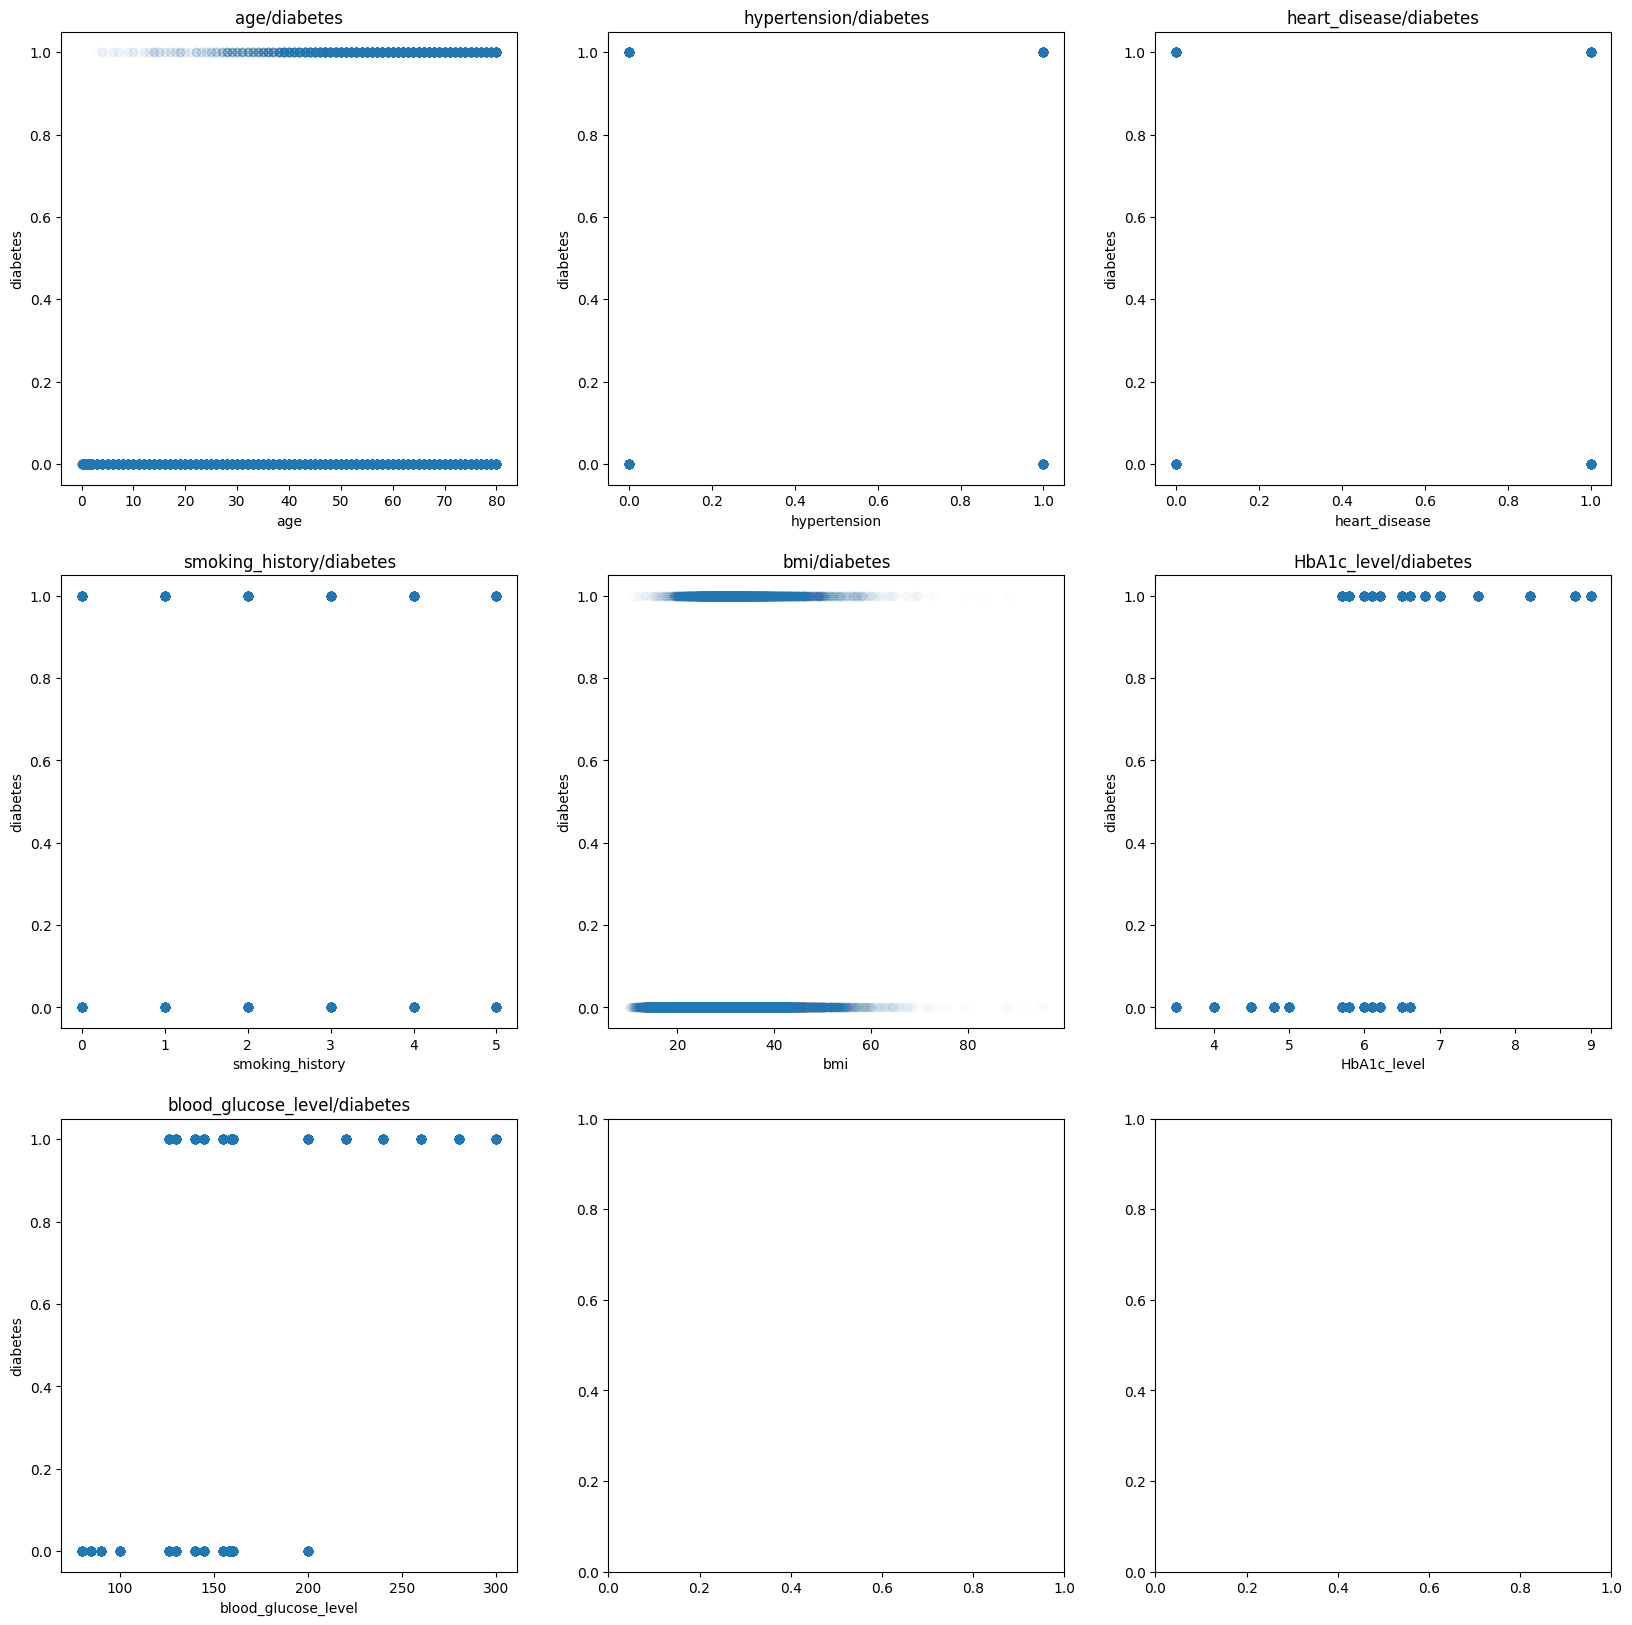

In [5]:
features = data.drop("diabetes", axis=1)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))


axes = axes.ravel() 

for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['diabetes'], alpha=0.01)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('diabetes')
    axes[i].set_title(f'{feature}/diabetes')


## PARTICIONANDO O DATASET

In [8]:
# X tem todas as linhas de todas as colunas smenos o output
X = data.iloc[:, :7]

# y tem todas as linhas de output
y = data.iloc[:, 7]

# Dividir os dados em treino e teste
# 25% para teste, 75% para treino por padrão
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Escalonando treino e teste:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Descobrindo o melhor K na forca bruta:

In [15]:
k_values = [i for i in range (1,30)]
scores = []
erros = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=5)
    scores.append(np.mean(score))
    erros.append(1-np.mean(score))

# Calculando o SSE:
scores = np.array(scores)
media = np.mean(scores)
desvios = scores-media
variancias = desvios**2
sse = np.sum(desvios)

print(f'SSE = {sse}')
print(f'Melhor K = {np.argmax(scores)}')

SSE = 3.1086244689504383e-15
Melhor K = 3


## Plotando Accuracy X k's e Error X K's:

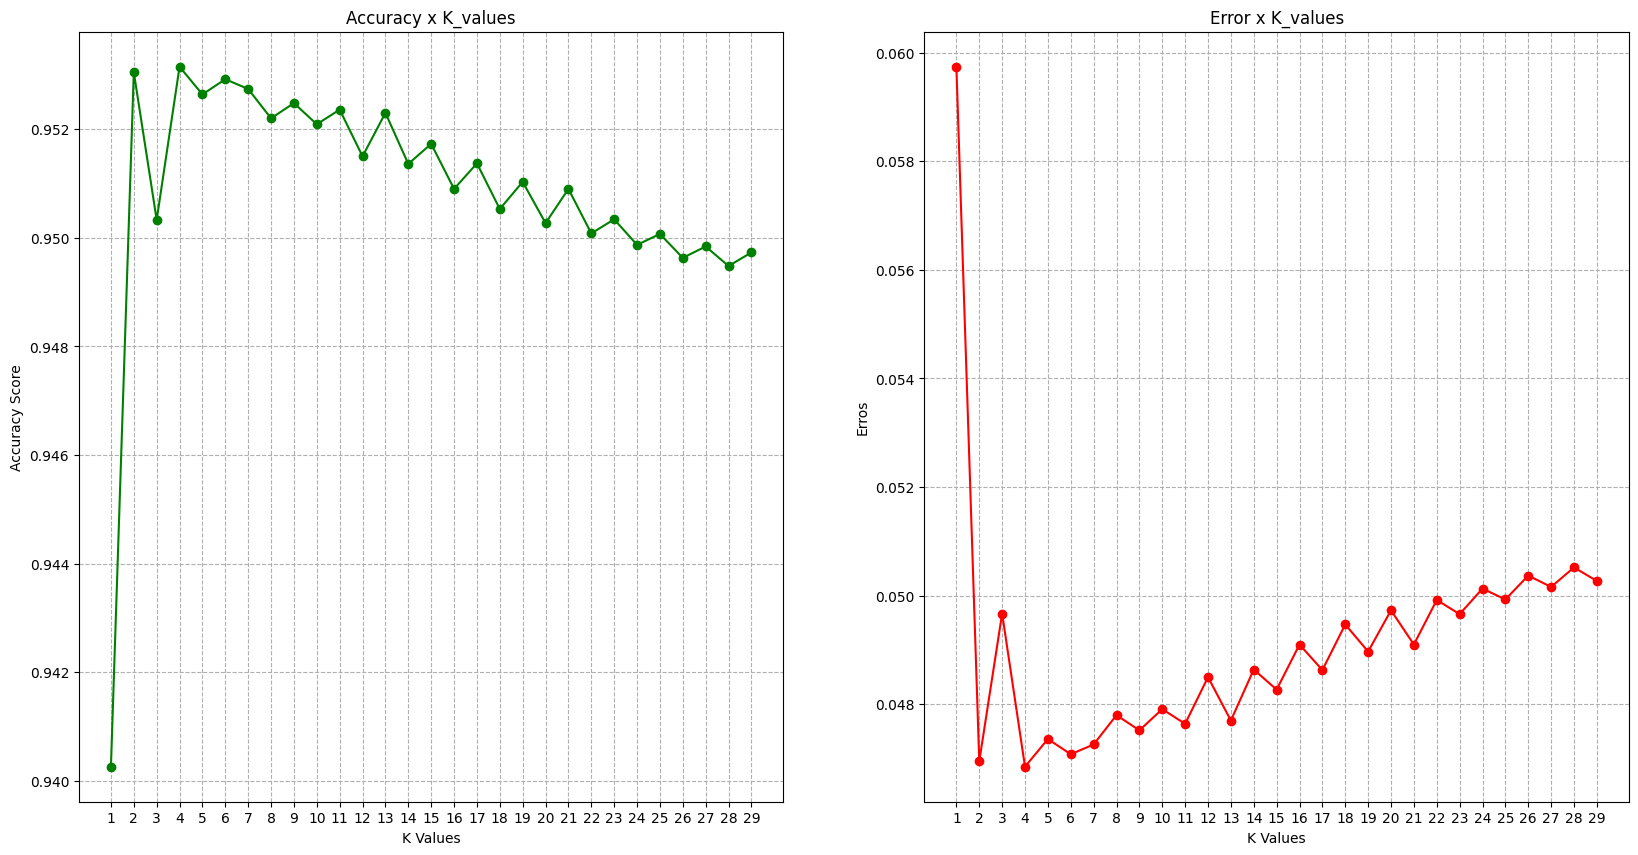

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title('Accuracy x K_values')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1.0))
plt.grid(visible=True, linestyle='--')
plt.plot(k_values, scores, marker = 'o', color='green')

plt.subplot(1,2,2)
plt.title('Error x K_values')
plt.xlabel("K Values")
plt.ylabel("Errors")
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1.0))
plt.grid(visible=True, linestyle='--')
plt.plot(k_values, erros, marker = 'o', color='red')

## Classificando de acordo com o melhor K testado na força bruta:

In [28]:
# separando o melhor K:
best_index = np.argmax(scores)
best_k = k_values[best_index]

# classificando de acordo com o melhor K:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

# Achando os valores significativos:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.96196
Precision: 0.9367559523809523
Recall: 0.5924705882352941


### Teste de combinações de valores de K, cálculos de distância e peso, a fim de encontrar um k alternativo: (Cross Validation)

In [33]:
# K de 1 a 10 pq demora o suficiente já
k_range = list(range(1,10))

# Peso uniform = 'todos tem peso igual, independe da distancia'
# Peso distance = 'peso é inverso da dist' -> quanto maior distancia, menos peso
weight_options = ['uniform', 'distance']

# P = 1 -> distancia City block (abs)
# P = 2 -> distancia Euclideana (sqr)
p_values = [1,2]

# Monta o param grid, é um dict
param_grid = dict(n_neighbors=k_range, weights = weight_options, p = p_values)

# Cria o GridSearchCV usando o knn_classifier pro melhor K
grid = GridSearchCV(knn_classifier, param_grid, cv= 10, scoring = 'accuracy')
grid.fit(X,y)
cv_dataframe = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'rank_test_score', 'params']]
cv_dataframe

,mean_test_score,std_test_score,rank_test_score,params
0,0.93931,0.001972,35,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}"
1,0.93931,0.001972,35,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}"
2,0.94059,0.002078,32,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}"
3,0.94059,0.002078,32,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}"
4,0.95101,0.001245,22,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}"
5,0.94039,0.001993,34,"{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}"
6,0.95317,0.001422,3,"{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}"
7,0.94170,0.002050,31,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}"
8,0.95007,0.001570,25,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
9,0.94692,0.001381,30,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}"


## Pegando a melhor combinação da Cross Validation e comparando aplicando no train/test estipulado anteriormente:

In [36]:
# supostos melhores parametros:
# classificando de acordo com o melhor K:
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='uniform',p=2)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

# Achando os valores significativos:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.96196
Precision: 0.9367559523809523
Recall: 0.5924705882352941


### DEU O MESMO RESULTADO DA FORÇA BRUTA 😱😱😱😱😱😱😱😱